In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pal = sns.color_palette()

In [3]:
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "data")

data_file_list = os.listdir(data_dir)
print("start check the size of each input file")
for data_file in data_file_list:
    data_file_path = os.path.join(data_dir, data_file)
    print('the fulll name of the file is : %s ' % data_file_path)
    file_size = os.path.getsize(data_file_path) * 1.0 / 1024 / 1024
    print("the file name %s, its size is : %.3f MB" % (data_file.ljust(10), file_size))

start check the size of each input file
the fulll name of the file is : /letv/kaggle/kaggle-quora/data/sample_submission.csv 
the file name sample_submission.csv, its size is : 21.312 MB
the fulll name of the file is : /letv/kaggle/kaggle-quora/data/test.csv 
the file name test.csv  , its size is : 299.468 MB
the fulll name of the file is : /letv/kaggle/kaggle-quora/data/train.csv 
the file name train.csv , its size is : 60.462 MB
the fulll name of the file is : /letv/kaggle/kaggle-quora/data/train_sample.csv 
the file name train_sample.csv, its size is : 55.324 MB


In [4]:
train_file = os.path.join(data_dir,"train.csv")
df_train = pd.read_csv(train_file)
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df_train['is_duplicate'].count().astype(int)

404290

/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


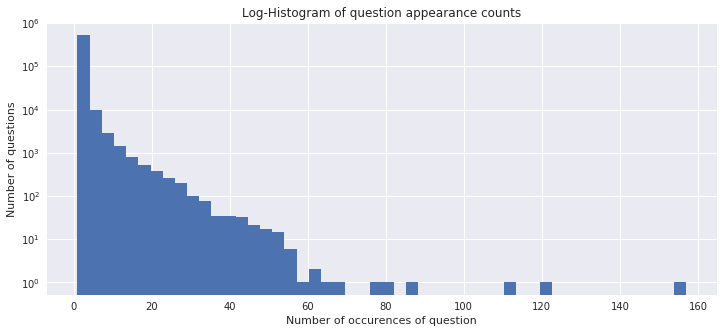

In [6]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

In [7]:
df_train[df_train["is_duplicate"] == 1]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
15,15,31,32,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1
16,16,33,34,What does manipulation mean?,What does manipulation means?,1
18,18,37,38,Why are so many Quora users posting questions ...,Why do people ask Quora questions which can be...,1
20,20,41,42,Why do rockets look white?,Why are rockets and boosters painted white?,1
29,29,59,60,How should I prepare for CA final law?,How one should know that he/she completely pre...,1


In [8]:
qids

0              1
1              3
2              5
3              7
4              9
5             11
6             13
7             15
8             17
9             19
10            21
11            23
12            25
13            27
14            29
15            31
16            33
17            35
18            37
19            39
20            41
21            43
22            45
23            47
24            49
25            51
26            53
27            55
28            57
29            59
           ...  
808550       691
808551    124172
808552    466328
808553    537906
808554    537908
808555     16064
808556    146284
808557    290649
808558    537910
808559    349794
808560     35364
808561    537914
808562     14005
808563    537916
808564     87385
808565    537917
808566    308365
808567    537918
808568    169786
808569    537921
808570    537923
808571     81495
808572     16773
808573    537925
808574    537927
808575    379845
808576    155606
808577    5379

In [9]:
len(np.unique(qids))

537933

In [10]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
17978      77
2675       68
28764      66
1772       63
24555      61
18753      58
4018       57
28133      56
3595       55
19621      55
18531      55
4951       55
13748      54
10024      54
10330      54
38         54
18296      53
11264      52
6551       52
20190      52
691        51
8461       51
6749       51
2322       51
33412      51
         ... 
95599       1
87403       1
259391      1
89450       1
1345        1
7490        1
13639       1
19784       1
17737       1
23882       1
32078       1
30031       1
34129       1
40274       1
38227       1
42325       1
48470       1
56666       1
54619       1
60764       1
64862       1
62815       1
66913       1
73058       1
77156       1
75109       1
81254       1
85352       1
83305       1
168274      1
dtype: int64

mean-train 59.86 std-train 31.99 mean-test 60.11 std-test 31.66 max-train 1169.00 max-test 1176.00


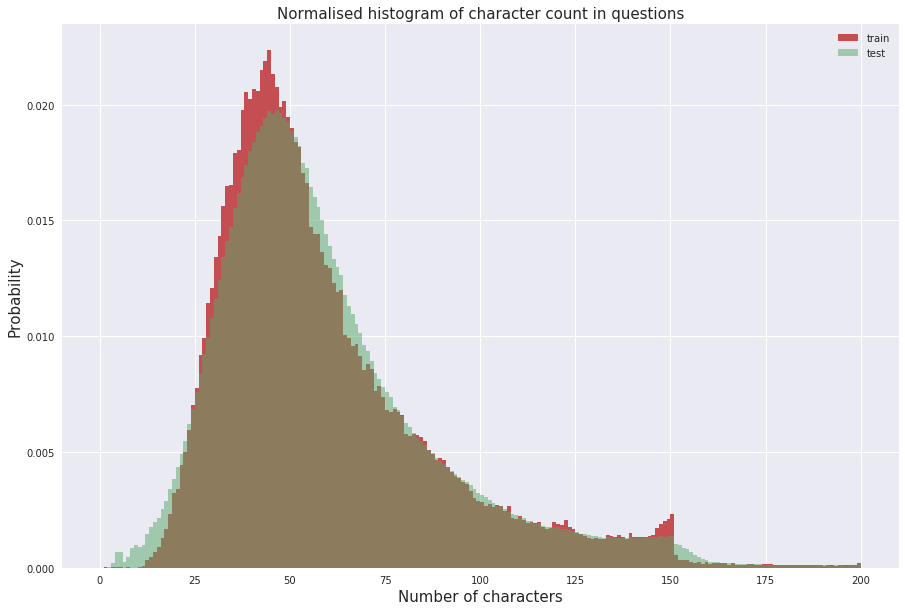

In [11]:
test_file = os.path.join(data_dir, "test.csv")
df_test = pd.read_csv(test_file)
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


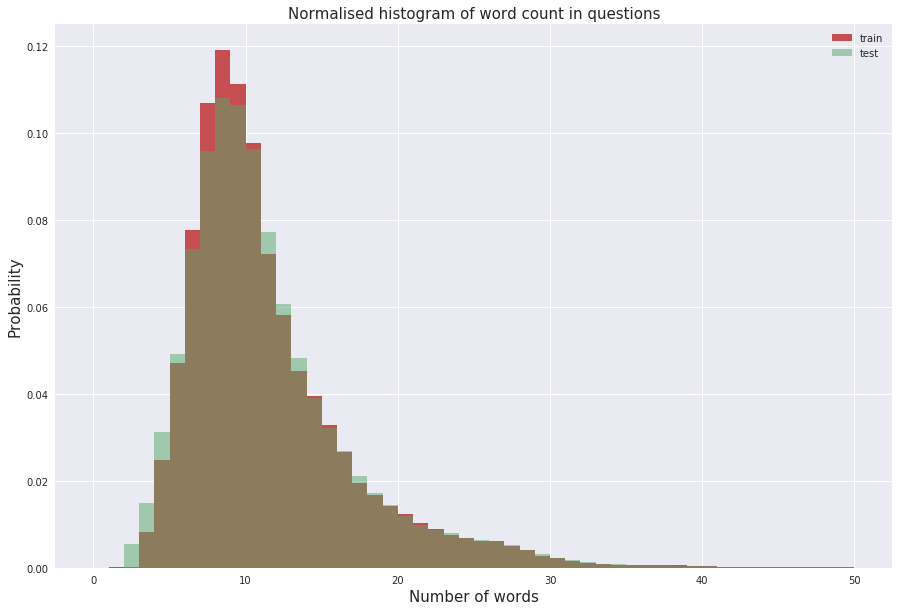

In [12]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

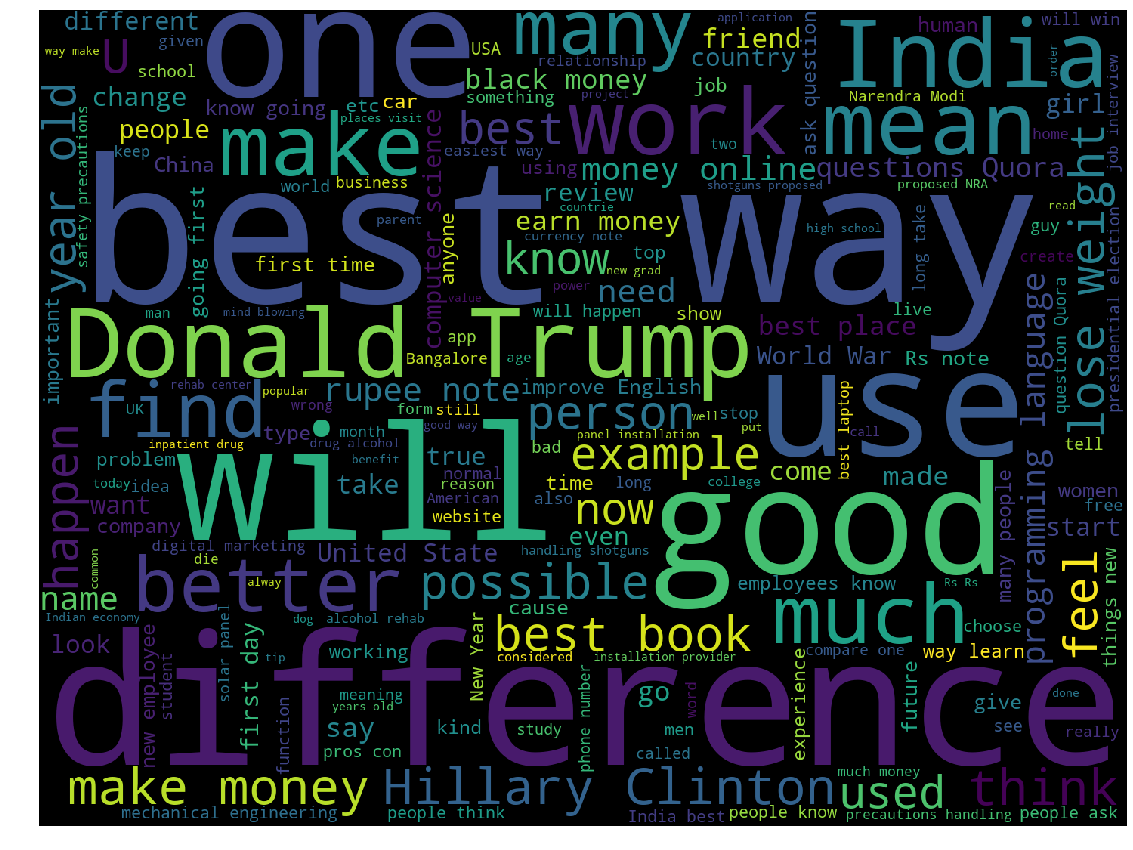

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

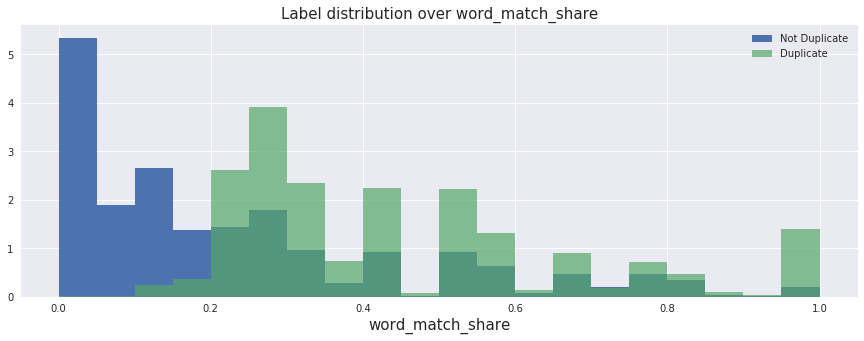

In [14]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

# def word_match_share(row):
#     q1words = {}
#     q2words = {}
#     for word in str(row['question1']).lower().split():
#         if word not in stops:
#             q1words[word] = 1
#     for word in str(row['question2']).lower().split():
#         if word not in stops:
#             q2words[word] = 1
#     if len(q1words) == 0 or len(q2words) == 0:
#         # The computer-generated chaff includes a few questions that are nothing but stopwords
#         return 0
#     shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
#     shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
#     R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
#     print R
#     return R

def word_match_share(row):
    q1words = set(str(row['question1']).lower().split()) - stops
    q2words = set(str(row['question2']).lower().split()) - stops
    if len(q1words | q2words) == 0:
        return 0
    R = len(q1words & q2words) * 1.0 / len(q1words | q2words)
    return R
plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [20]:
from collections import Counter

def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1.0 / (count + eps)
    
eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}
print "confederates" in weights

True


In [44]:
# 有点不一样！！！
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
# print ("\n".join([sorted(key + "," + value for key,value in (weights.items(), key=lambda x: x[1], reverse=True)[:10])])
least_commen_lists = sorted(weights.items(), key=lambda x: x[1], reverse=True)[:20]
print "\n".join([x[0] + "," + str(x[1]) for x in least_commen_lists])
print "シ counts" ,counts["シ"]
print "caste/tribe count", counts["caste/tribe"]

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 
chameleons,9.99800039992e-05
275,9.99800039992e-05
276,9.99800039992e-05
kid:,9.99800039992e-05
usenet,9.99800039992e-05
(football,9.99800039992e-05
dittofish?,9.99800039992e-05
sneha,9.99800039992e-05
population),9.99800039992e-05
,delhi,9.99800039992e-05
refunding,9.99800039992e-05
dnr,9.99800039992e-05
blackmailed?,9.99800039992e-05
pc/laptop,9.99800039992e-05
dota/dota2?,9.99800039992e-05
"celeron",,9.99800039992e-05
climaxing,9.99800039992e-05
(kid,9.99800039992e-05
sentencing,9.99800039992e-05
caste/tribe,9.99800039992e-05
シ counts 2
caste/tribe count 2


/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


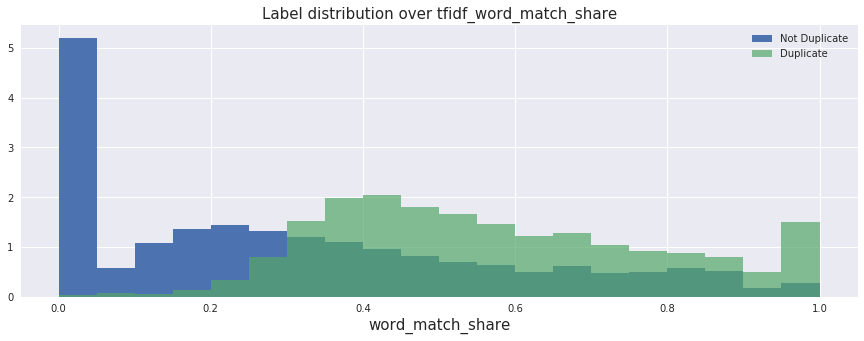

In [46]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [55]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(1)))

('Original AUC:', 0.78055320062812139)
('   TFIDF AUC:', 0.77049103945861552)


In [50]:
train_word_match 

0         0.571429
1         0.181818
2         0.222222
3         0.000000
4         0.000000
5         0.307692
6         0.000000
7         0.333333
8         0.333333
9         0.222222
10        0.000000
11        0.400000
12        1.000000
13        0.400000
14        0.692308
15        0.187500
16        0.333333
17        0.000000
18        0.363636
19        0.428571
20        0.400000
21        0.000000
22        0.500000
23        0.000000
24        0.000000
25        0.625000
26        0.250000
27        0.000000
28        0.666667
29        0.333333
            ...   
404260    0.400000
404261    0.428571
404262    0.500000
404263    0.200000
404264    0.153846
404265    0.200000
404266    0.086957
404267    0.666667
404268    0.000000
404269    0.500000
404270    0.250000
404271    0.000000
404272    0.307692
404273    0.363636
404274    0.222222
404275    0.000000
404276    0.000000
404277    0.000000
404278    0.166667
404279    0.181818
404280    0.833333
404281    0.

In [56]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in long_scalars


In [60]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values
# print x_train
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) * 1.0 / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) * 1.0 / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in long_scalars


0.191243661001


In [61]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

/home/whq/.pyenv/versions/2.7.13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683189	valid-logloss:0.683238
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.602041	valid-logloss:0.602515
[20]	train-logloss:0.544863	valid-logloss:0.545663
[30]	train-logloss:0.503151	valid-logloss:0.504194
[40]	train-logloss:0.471989	valid-logloss:0.473231
[50]	train-logloss:0.448341	valid-logloss:0.449746
[60]	train-logloss:0.430164	valid-logloss:0.431706
[70]	train-logloss:0.416072	valid-logloss:0.417726
[80]	train-logloss:0.405012	valid-logloss:0.406775
[90]	train-logloss:0.396327	valid-logloss:0.398177
[100]	train-logloss:0.389488	valid-logloss:0.391404
[110]	train-logloss:0.384071	valid-logloss:0.386038
[120]	train-logloss:0.379786	valid-logloss:0.381792
[130]	train-logloss:0.376375	valid-logloss:0.378414
[140]	train-logloss:0.373661	valid-logloss:0.375724
[150]	train-logloss:0.371482	valid-logloss:0.373567
[160]	train-logloss:0.369728

In [64]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)